<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> Modelos GARCH - Simulación estocástica</h1>
<h2 align='center'> Diego Astaburuaga, David Rivas </h2>
<hr style="height:2px;border:none"/>

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy2.png" alt="Capybara trabajando" width="300" style="border: 7px solid black;">
    <br>
    <small>Foto de Diego discutiendo con chatgpt.</small>
</p>

# Definiciones y modelo GARCH(p,q)

Esto debe ser complementado con las presentaciones e información recopilada sobre el tema.

# Estudio de simulación del modelo GARCH(p,q)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random

## Función para simular $n$ datos desde un proceso GARCH(p,q)

In [41]:
def simulate_garch(alpha=None, beta=None, omega=None, n=1, estacionarity = True):
    if alpha is None:
        alpha = np.random.uniform(0, 0.3, 1)
    
    if beta is None:
        beta = np.random.uniform(0, 0.3, 1)
    
    if omega is None:
        omega = np.random.uniform(0.5, 1.5)

    p, q = len(alpha), len(beta)

    # Check and adjust coefficients to satisfy stationarity condition
    sum_alpha = np.sum(alpha)
    sum_beta = np.sum(beta)

    if estacionarity:
        # If the sum of coefficients exceeds 1, rescale them
        if sum_alpha + sum_beta >= 1:
            scaling_factor = 0.9 / (sum_alpha + sum_beta)
            alpha *= scaling_factor
            beta *= scaling_factor

    # Simulate GARCH(p, q) process
    epsilon = np.random.normal(size=n)
    sigma_sq = np.zeros(n)

    for t in range(max(p, q)):
        sigma_sq[t] = omega

    for t in range(max(p, q), n):
        sigma_sq[t] = omega + np.sum(alpha * epsilon[t-p+1:t+1]**2) + np.sum(beta * sigma_sq[t-q:t])

    # Generate time series realization
    simulated_data = pd.Series(np.sqrt(sigma_sq), name='Simulated GARCH(p, q)')

    return simulated_data

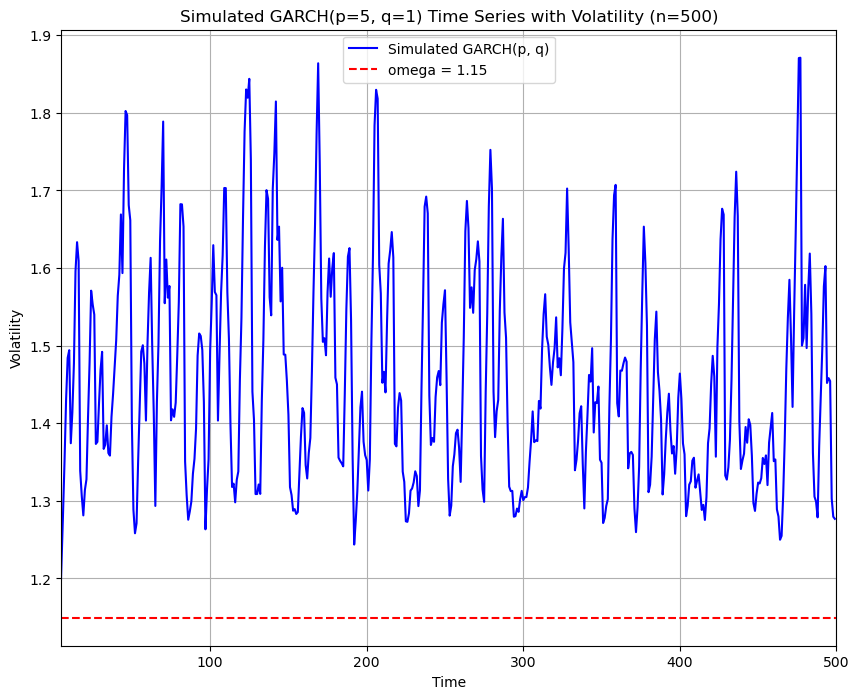

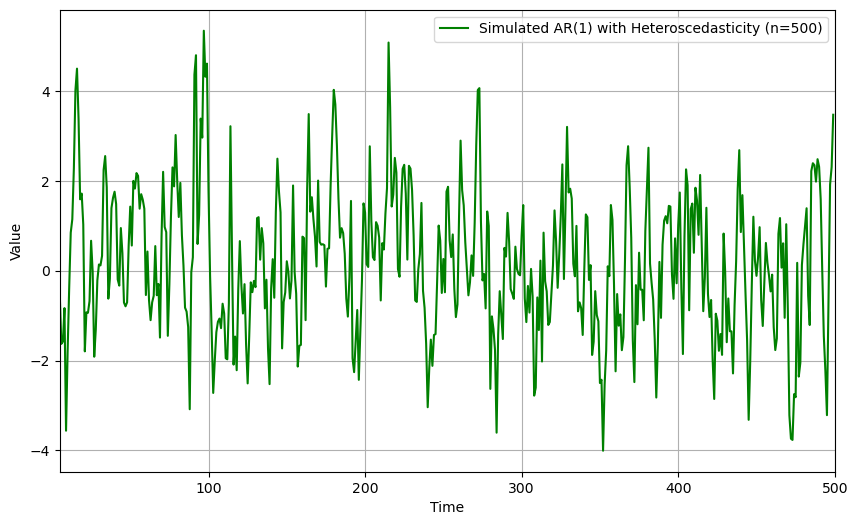

In [58]:
# Set seed using the numpy module
np.random.seed(2609)

# Simulate GARCH(5, 1) with 500 observations
n_obs = 500
p = 5
q = 1

alpha = np.random.uniform(0, 0.3, p)
beta = np.random.uniform(0, 0.3, q)

simulated_data_garch = simulate_garch(alpha=alpha, beta=beta, n=n_obs)

# Visualize the simulated time series
plt.figure(figsize=(10, 8))
simulated_data_garch.plot(color='blue', title=f'Simulated GARCH({p=}, {q=}) Time Series with Volatility (n={n_obs})')
plt.axhline(y=simulated_data_garch.iloc[0], color='red', linestyle='--', label=f'omega = {simulated_data_garch.iloc[0]:.2f}')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.xlim(max(p, q), n_obs)
plt.legend()
plt.grid(True)
plt.show()

# Simulate AR(1) model with heteroscedasticity using GARCH(p, q) variances
alpha_ar = 0.7
epsilon_ar = np.random.normal(size=n_obs)
simulated_data_ar = np.zeros(n_obs)

for t in range(1, n_obs):
    simulated_data_ar[t] = alpha_ar * simulated_data_ar[t-1] + np.sqrt(simulated_data_garch[t]) * epsilon_ar[t]

# Visualize the simulated AR(1) time series with heteroscedasticity
plt.figure(figsize=(10, 6))
plt.plot(simulated_data_ar, color='green', label=f'Simulated AR(1) with Heteroscedasticity (n={n_obs})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xlim(max(p, q), n_obs)
plt.legend()
plt.grid(True)
plt.show()

## Simulaciones para distintos $p,q$ con estacionaridad

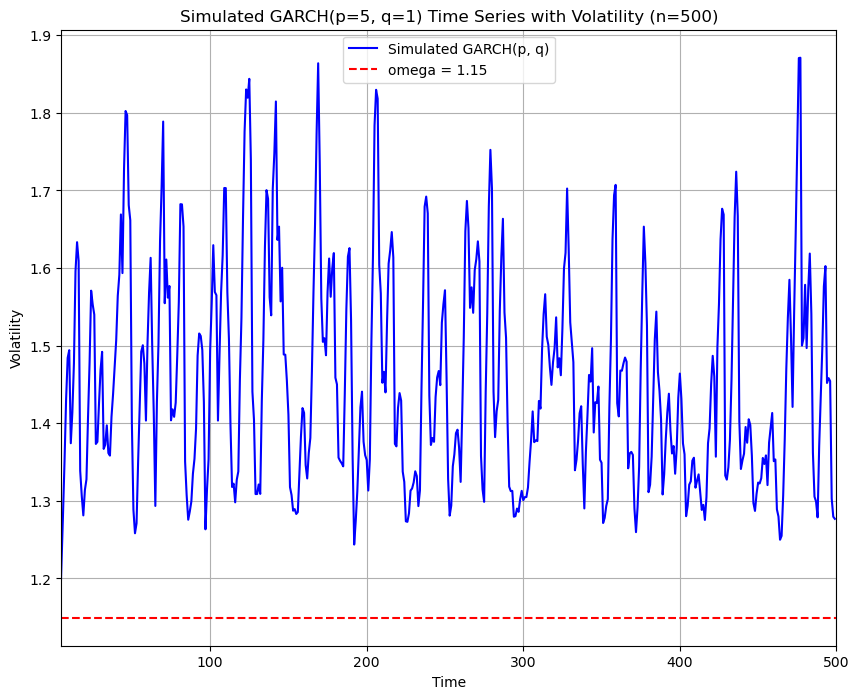

In [43]:
# Visualize the simulated time series
plt.figure(figsize=(10, 8))
simulated_data_garch.plot(color='blue', title=f'Simulated GARCH({p=}, {q=}) Time Series with Volatility (n={n_obs})')
plt.axhline(y=simulated_data_garch.iloc[0], color='red', linestyle='--', label=f'omega = {simulated_data_garch.iloc[0]:.2f}')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.xlim(max(p, q), n_obs)
plt.legend()
plt.grid(True)
plt.show()

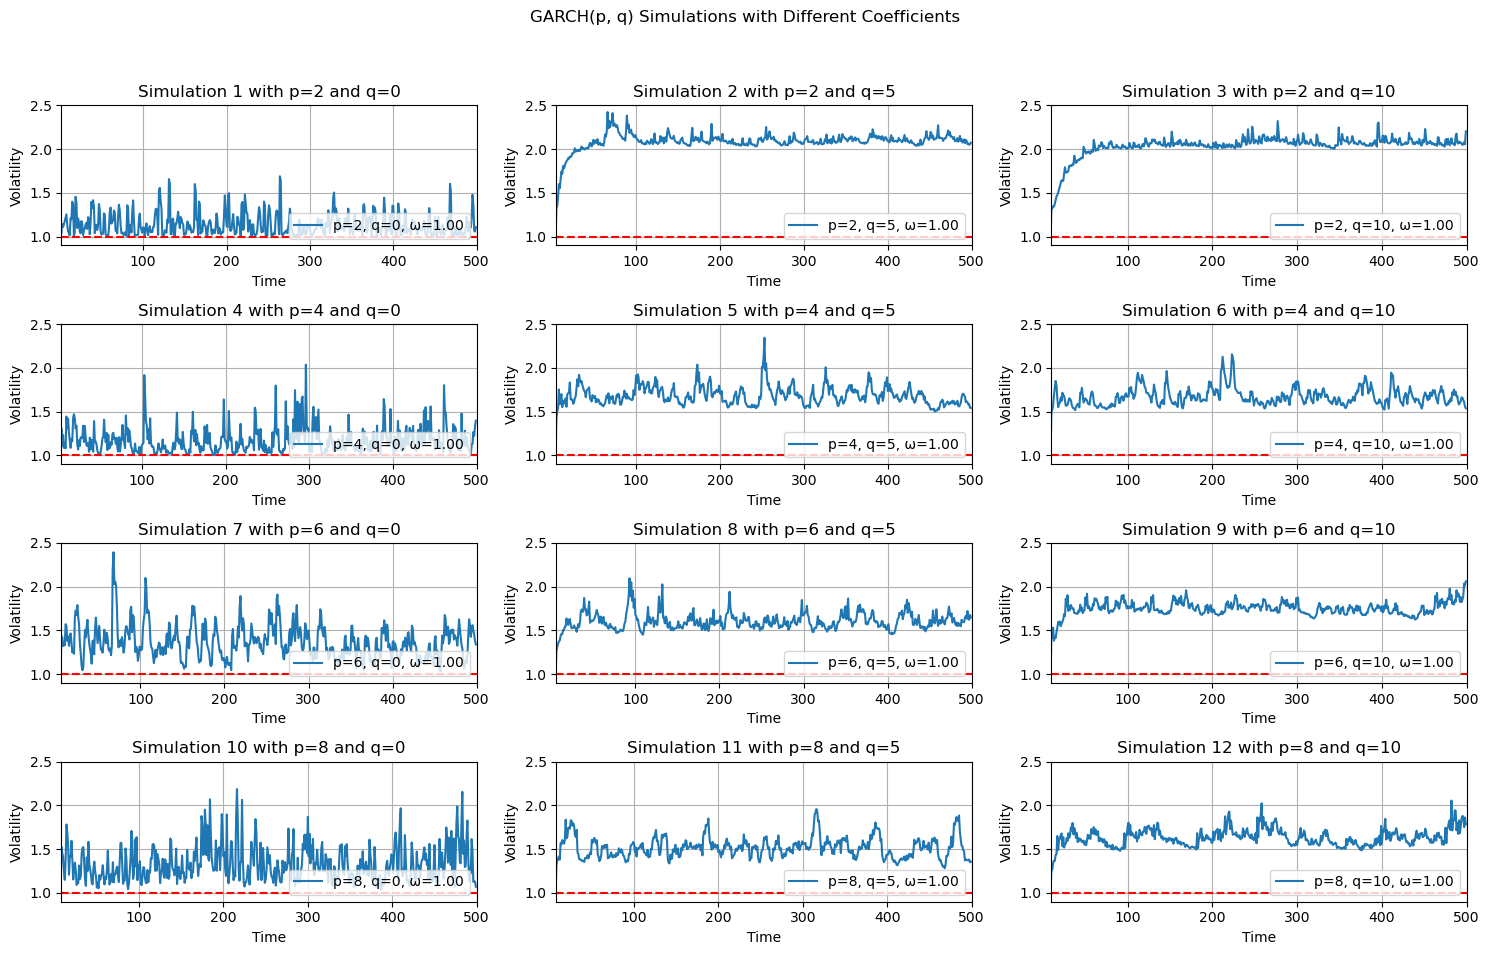

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Your simulate_garch function (unchanged)

# Function to plot multiple simulations in a 3x3 grid
def plot_simulations():
    
    np.random.seed(2609)

    omega = 1
    n_obs = 500

    valores_p = [2, 4, 6, 8]
    valores_q = [0, 5, 10]

    fig, axes = plt.subplots(len(valores_p), len(valores_q), figsize=(15, 10))
    fig.suptitle('GARCH(p, q) Simulations with Different Coefficients')


    for i in range(len(valores_p)):
        for j in range(len(valores_q)):
            p = valores_p[i]
            q = valores_q[j]
            alpha = np.random.uniform(0, 0.3, p)
            beta = np.random.uniform(0, 0.3, q)

            simulated_data = simulate_garch(alpha=alpha, beta=beta, omega=omega, n=n_obs)

            axes[i, j].plot(simulated_data, label=f'{p=}, {q=}, ω={omega:.2f}')
            axes[i, j].legend(loc='lower right')
            axes[i, j].grid(True)
            axes[i, j].set_title(f'Simulation {i*3 + j + 1} with {p=} and {q=}')

            axes[i, j].set_xlabel('Time')
            axes[i, j].set_ylabel('Volatility')
            axes[i, j].set_xlim(max(p, q), n_obs)
            axes[i, j].set_ylim(0.9*omega, 2.5)
            axes[i, j].axhline(y=omega, color='red', linestyle='--', label=f'{omega}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Call the function to plot simulations
plot_simulations()